In [2]:
# Setup imports
import sys
from pathlib import Path

# Get project root directory
# If we're in notebooks/, go up one level; otherwise use current directory
current_dir = Path.cwd()
if (current_dir / "notebooks").exists():
    # We're at project root
    project_root = current_dir
elif current_dir.name == "notebooks":
    # We're inside notebooks/ directory, go up one level
    project_root = current_dir.parent
else:
    # Default to current directory
    project_root = current_dir

# Add src to Python path
sys.path.insert(0, str(project_root / "src"))

from inside_airbnb import data_loading, preprocessing, analysis, visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
data_folder = project_root / "data" / "raw"
full_df = data_loading.load_monthly_listings(data_folder, year=2025)

Loaded 12 files:
 - listings_April_2025.csv
 - listings_August_2025.csv
 - listings_December_2025.csv
 - listings_February_2025.csv
 - listings_January_2025.csv
 - listings_July_2025.csv
 - listings_June_2025.csv
 - listings_March_2025.csv
 - listings_May_2025.csv
 - listings_November_2025.csv
 - listings_October_2025.csv
 - listings_September_2025.csv

Final combined shape: (441156, 82)


In [ ]:
# Preprocess
full_df = preprocessing.preprocess_data(full_df, max_price=5000.0)

Preprocessing data...
  Original shape: (441156, 82)
Filtered out 201,840 listings with price >= $5,000
Remaining: 239,316 listings (54.2%)
  Final shape: (239316, 83)


In [5]:
# Analysis
monthly_stats = analysis.calculate_rental_stats(full_df)

# Format the display: currency for price columns, integer for count
display(monthly_stats.style.format({
    'count': '{:,.0f}',
    'mean': '${:,.2f}',
    'median': '${:,.2f}',
    'std': '${:,.2f}'
}))

,count,mean,median,std,month
month_num,,,,,
1,"22,956",$189.40,$132.00,$231.57,January
2,"23,178",$187.13,$130.00,$227.18,February
3,"22,289",$204.41,$140.00,$246.46,March
4,"22,108",$212.27,$145.00,$251.65,April
5,"21,814",$223.84,$150.00,$268.09,May
6,"21,295",$224.95,$152.00,$268.87,June
7,"21,163",$220.57,$151.00,$261.62,July
8,"21,155",$219.76,$150.00,$261.18,August
9,"21,010",$231.15,$150.00,$276.80,September


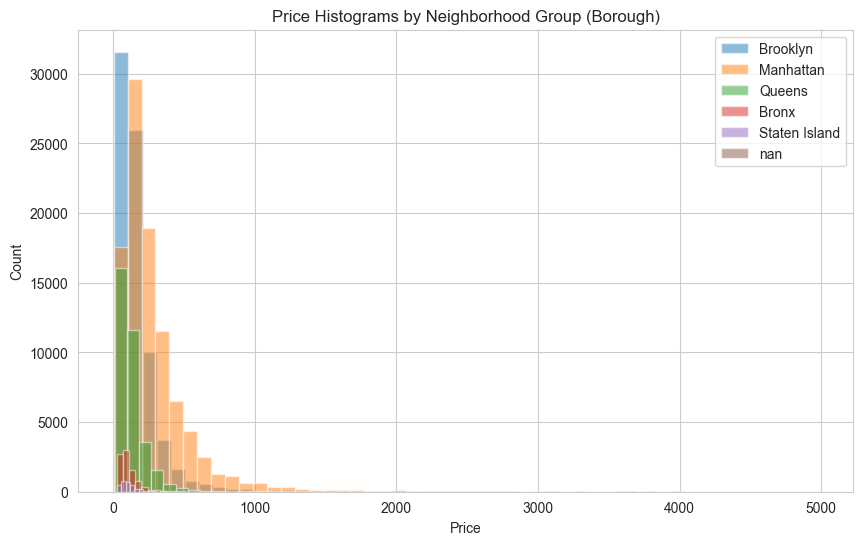

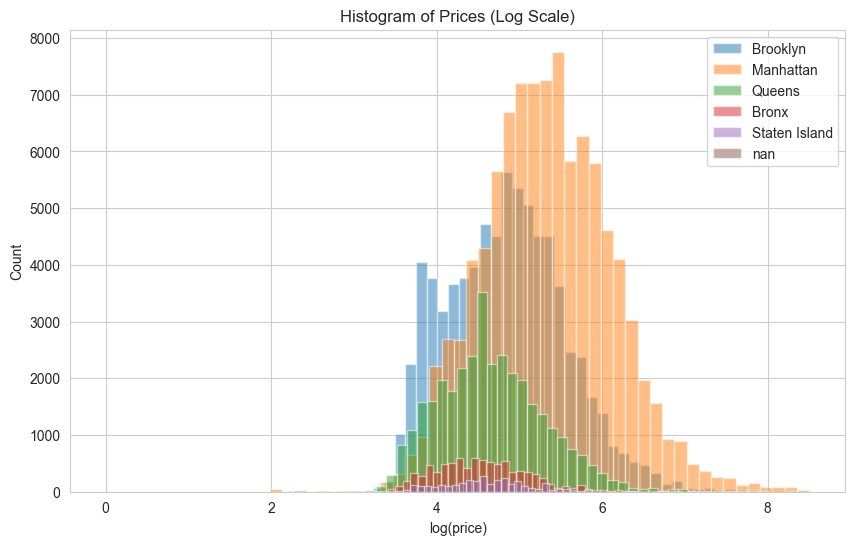

z:\Cursor Projects\InsideAirbnbAnalysis\src\inside_airbnb\visualization.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


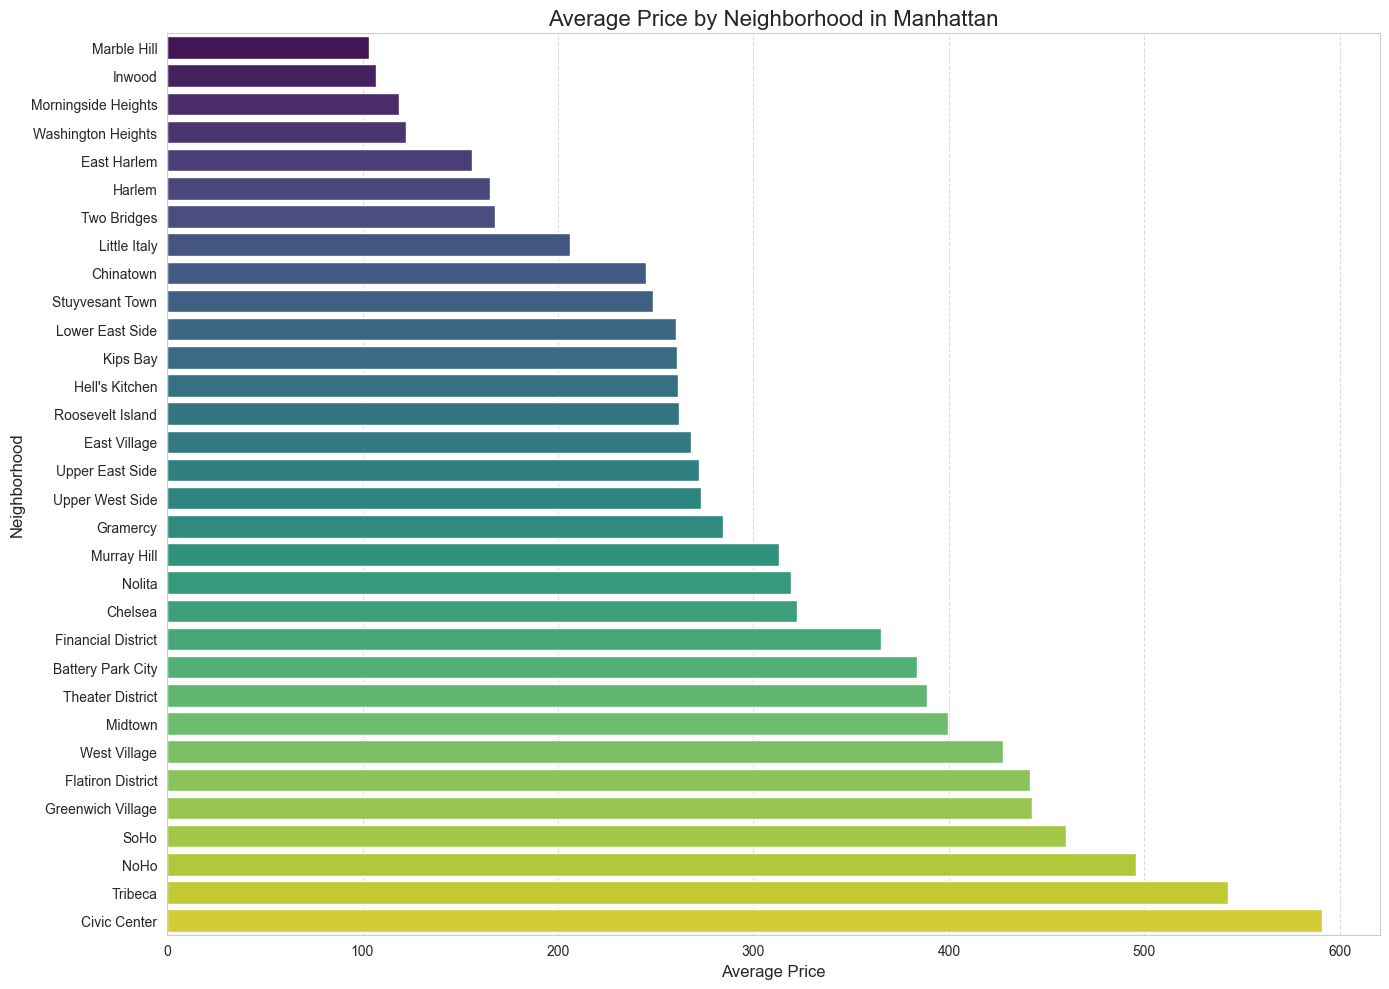

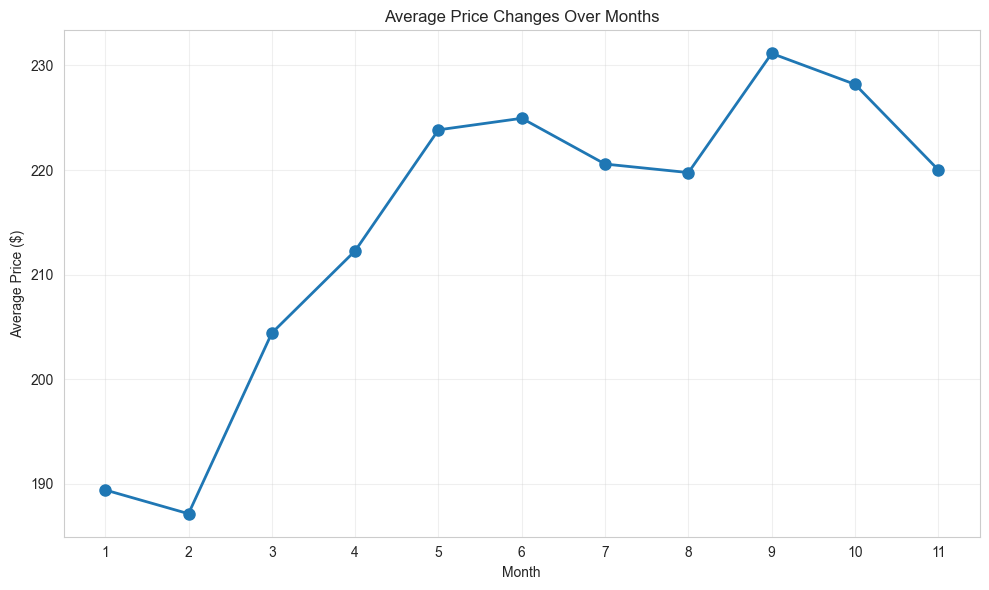

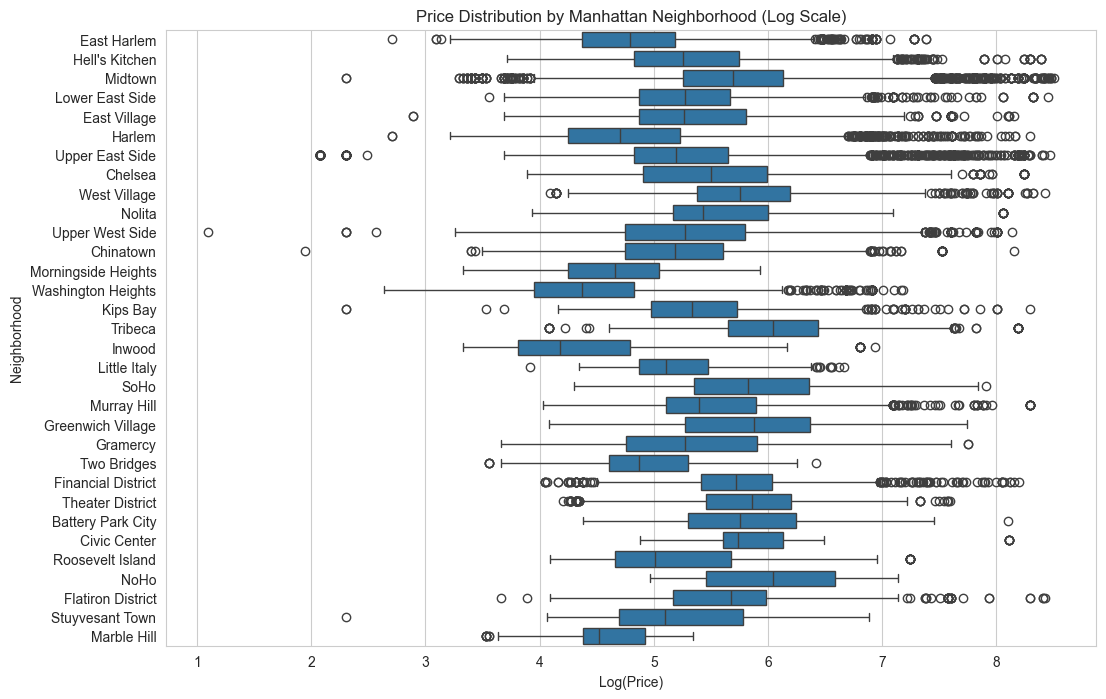

In [16]:
# Visualizations
visualization.plot_price_histograms_by_borough(full_df)
visualization.plot_price_histogram_log_scale(full_df)
visualization.plot_manhattan_neighborhood_prices(full_df)
visualization.plot_seasonal_trends(full_df)
visualization.plot_manhattan_boxplot(full_df)

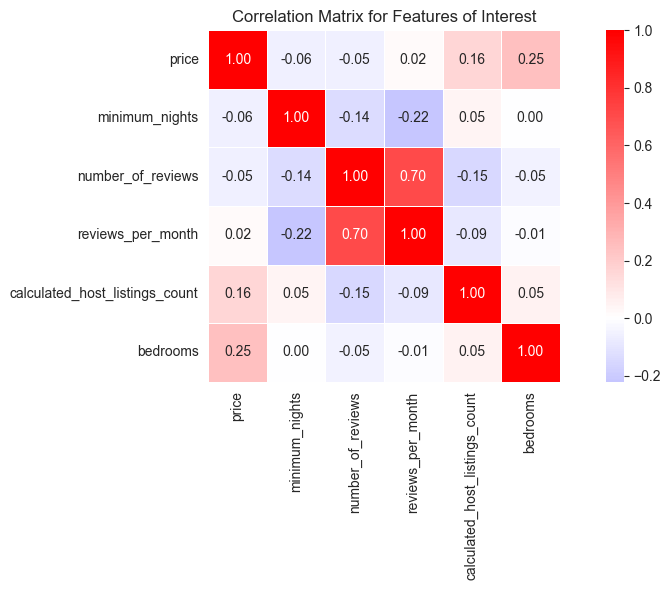

In [15]:
cols_of_interest = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'bedrooms']

visualization.plot_correlation_heatmap(full_df, cols_of_interest)